<a href="https://colab.research.google.com/github/yikchungchan/DSA-5101-P1/blob/ashwins-branch/DSA5101_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSA 5101 - Python Machine Learning Project

#### Group 28

*   Ashwin Kumaar Raviraj (A0162603N)
*   Chan YikChung
*   Tran Manh Hung




In this group project, we will immerse ourselves in the intriguing domain of predictive analysis using the Bank Marketing dataset. Our primary objective is to harness the capabilities of machine learning to forecast whether a client will opt for a term deposit. The challenge at hand is centered on the direct marketing campaigns carried out by a Portuguese banking institution.

These campaigns primarily relied on telephone conversations. Notably, multiple interactions with the same client were often required to ascertain whether the client would choose to subscribe to the bank's term deposit product ('yes') or decline it ('no').

As part of our group project, we will leverage the Bank Marketing dataset to predict client subscriptions to term deposits.


---


As the dataset is structured, we will follow the traditional ML Model Building steps as listed below:


1.   **Conceptualization of the modeling task:** This crucial first step entails determining what the output of the model should be, how this model will be used and by whom, and how it will be embedded in existing or new business processes.
2.   **Data collection:** The data traditionally used are mostly numeric data derived from internal and external sources. Such data are typically already in a structured tabular format, with columns of features, rows of instances, and each cell representing a particular value.
3.   **Data preparation and wrangling:** This step involves cleansing and preprocessing of the raw data. Cleansing may entail resolving missing values, out-of-range values, and the like. Preprocessing may involve extracting, aggregating, filtering, and selecting relevant data columns.
4.   **Data exploration:** This step encompasses exploratory data analysis, feature selection, and feature engineering.
5.   **Model training and evaluation:** This step involves selecting the appropriate ML method (or methods), evaluating performance of the trained model, and tuning the model accordingly.



# 1. Conceptualization of the modeling task


In this step, we define the scope and purpose of our predictive modeling task using the Bank Marketing dataset.


*   **Defining the Model's Output:** The output of our model would be the prediction of whether a client will subscribe to a term deposit ('yes') or not ('no'). This output can be critical for the bank's marketing efforts and customer engagement strategies.
*   **Identifying Stakeholders:** In our context, the stakeholders are ourselves (group members). However given the original context of the dataset, the key stakeholders who will benefit from the model's predictions include the bank's marketing teams, campaign managers, and customer relationship managers who can use the insights to tailor their strategies for client engagement.
*   **Integration with Business Processes:** Understanding how the model will fit into existing or new business processes is essential. In the context of the bank marketing dataset, we would consider how the model's predictions will be incorporated into the bank's marketing campaigns and help allocate resources more efficiently.

In the real-world context, by clarifying the model's purpose, its intended users, and its integration into the bank's operations, we will be better prepared to develop a robust predictive model that adds value to the marketing efforts of the bank.



---



# 2. Data Collection

While the traditional process of data collection often involves acquiring data from various internal and external sources, we are provided with a pre-existing dataset for our bank marketing project. This dataset is a valuable resource that contains a wealth of information, and it is already structured in a tabular format, making it suitable for analysis.

In [213]:
import numpy as np
import pandas as pd

#import the training and test data
url_train = "https://raw.githubusercontent.com/yikchungchan/DSA-5101-P1/main/traininingdata.txt"
url_test = "https://raw.githubusercontent.com/yikchungchan/DSA-5101-P1/main/testdata.txt"

# assign data to pandas DataFrame
df_train_raw = pd.read_csv(url_train, sep=';')
df_test_raw = pd.read_csv(url_test, sep=';')

# assign the training dataframe to `df`
df_raw = df_train_raw

# print df
df_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,management,single,tertiary,no,1243,yes,no,telephone,13,nov,86,1,174,1,failure,no
36164,60,blue-collar,married,secondary,no,171,yes,no,unknown,19,may,219,2,-1,0,unknown,no
36165,41,technician,married,secondary,no,-274,yes,no,unknown,27,may,182,3,-1,0,unknown,no
36166,45,blue-collar,married,primary,no,103,no,no,cellular,28,jan,64,3,-1,0,unknown,no


In [214]:
df_test_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,48,housemaid,married,tertiary,no,468,yes,no,unknown,14,may,220,1,-1,0,unknown,no
1,31,management,single,tertiary,no,10215,no,no,cellular,22,aug,139,2,-1,0,unknown,no
2,45,blue-collar,married,primary,no,900,yes,no,unknown,9,jun,213,1,-1,0,unknown,no
3,58,blue-collar,married,primary,no,1231,no,no,unknown,20,jun,21,3,-1,0,unknown,no
4,35,technician,single,tertiary,no,5301,no,no,cellular,21,nov,937,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,27,services,single,secondary,no,1,yes,yes,unknown,2,jun,162,3,-1,0,unknown,no
9039,34,blue-collar,married,secondary,no,175,yes,no,cellular,14,may,50,2,364,2,failure,no
9040,34,blue-collar,married,primary,no,1873,yes,no,cellular,2,feb,192,1,-1,0,unknown,no
9041,37,technician,single,secondary,no,61,yes,no,unknown,19,may,182,8,-1,0,unknown,no


#### 2.2 Attribute Information

The following information was taken from the `readme.txt` file accompanying the dataset.

##### Input variables

**bank client data:**

1.   `age` (numeric)
2.   `job` : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student", "blue-collar", "self-employed","retired","technician","services")
3.   `marital` : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4.   `education` (categorical: "unknown","secondary","primary","tertiary")
5.   `default` : has credit in default? (binary: "yes","no")
6.   `balance` : average yearly balance, in euros (numeric)
7.   `housing` : has housing loan? (binary: "yes","no")
8.   `loan` : has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**

9.   `contact` : contact communication type (categorical: "unknown","telephone","cellular")
10.   `day` : last contact day of the month (numeric)
11.   `month` : last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12.   `duration` : last contact duration, in seconds (numeric)

**other attributes:**

13.   `campaign` : number of contacts performed during this campaign and for this client (numeric, includes last contact)
14.   `pdays` : number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15.   `previous` : number of contacts performed before this campaign and for this client (numeric)
16.   `poutcome` : outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


##### Output variable (desired target):
17.   `y` : has the client subscribed a term deposit? (binary: "yes","no")



---



# 3. Data Preparation and Wrangling

As we have collected the data, the data preparation and wrangling stage begins. This stage involves two important tasks: cleansing and preprocessing, respectively.

**Data Preparation (Cleansing):** This is the initial and most common task in data preparation that is performed on raw data. Data cleansing is the process of examining, identifying, and mitigating errors in raw data. Normally, the raw data is neither sufficiently complete nor sufficiently clean to directly train the ML model. Manually entered data can have incomplete, duplicated, erroneous, or inaccurate values. Automated data (recorded by systems) can have similar problems due to server failures and software bugs.

**Data Wrangling (Preprocessing):** This task performs transformations and critical processing steps on the cleansed data to make the data ready for ML model training. Raw data most commonly are not present in the appropriate format for model consumption. After the cleansing step, data need to be processed by dealing with outliers, extracting useful variables from existing data points, and scaling the data (if required).

In the context of our bank marketing project, this step is pivotal in ensuring that our dataset is ready for predictive modeling.

#### 3.1 Data Initialization and Info

In [215]:
# info of the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB


In [216]:
# columns of the dataset
df_raw.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [217]:
# shape of the dataset
df_raw.shape

(36168, 17)

In [218]:
# find mean of the dataset group by the 'y' value
df_raw.groupby('y').mean(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.857156,1310.864702,15.870902,220.782196,2.852115,35.878417,0.502583
yes,41.583077,1774.109903,15.081305,542.036871,2.149374,68.973056,1.160955


#### 3.2 Data Preparation (Cleansing)

Our data is presented in a structured format, which means it is organized in a systematic format that is readily searchable and readable by computer operations for processing and analyzing. In structured data, data errors can be in the form of incomplete, invalid, inaccurate, inconsistent, non-uniform, and duplicate data observations.

1.   *Incompleteness error* is where the data is not present, resulting in missing data. This can be corrected by investigating alternate data sources.
2.   *Invalidity error* is where the data is outside of a meaningful range, resulting in invalid data. This can be corrected by verifying other administrative data records.
3.   *Inaccuracy error* is where the data is not a measure of true value. This can be rectified with the help of business records and administrators.
4.   *Inconsistency error* is where the data conflict with the corresponding data points or reality. This contradiction should be eliminated by clarifying with another source.
5.   *Non-uniformity error* is where the data is not present in an identical format. This can be resolved by converting the data points into a preferable standard
format.
6.   *Duplication error* is where duplicate observations is present. This can be corrected by removing the duplicate entries.


The aim of this step aim to identify and mitigate all such errors.

In [219]:
# check for null values
df_raw.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

<Axes: >

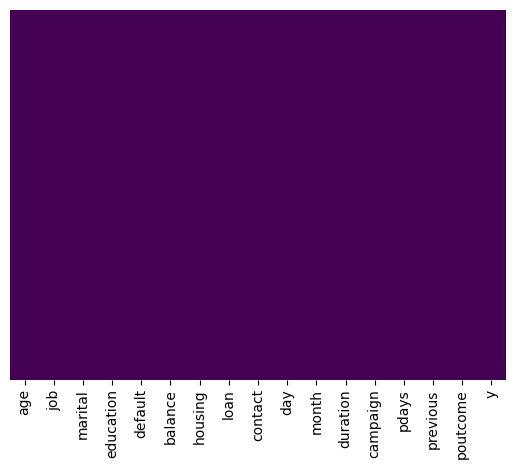

In [220]:
# plotting null values in a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df_raw.isnull(), yticklabels=False, cbar=False, cmap='viridis')

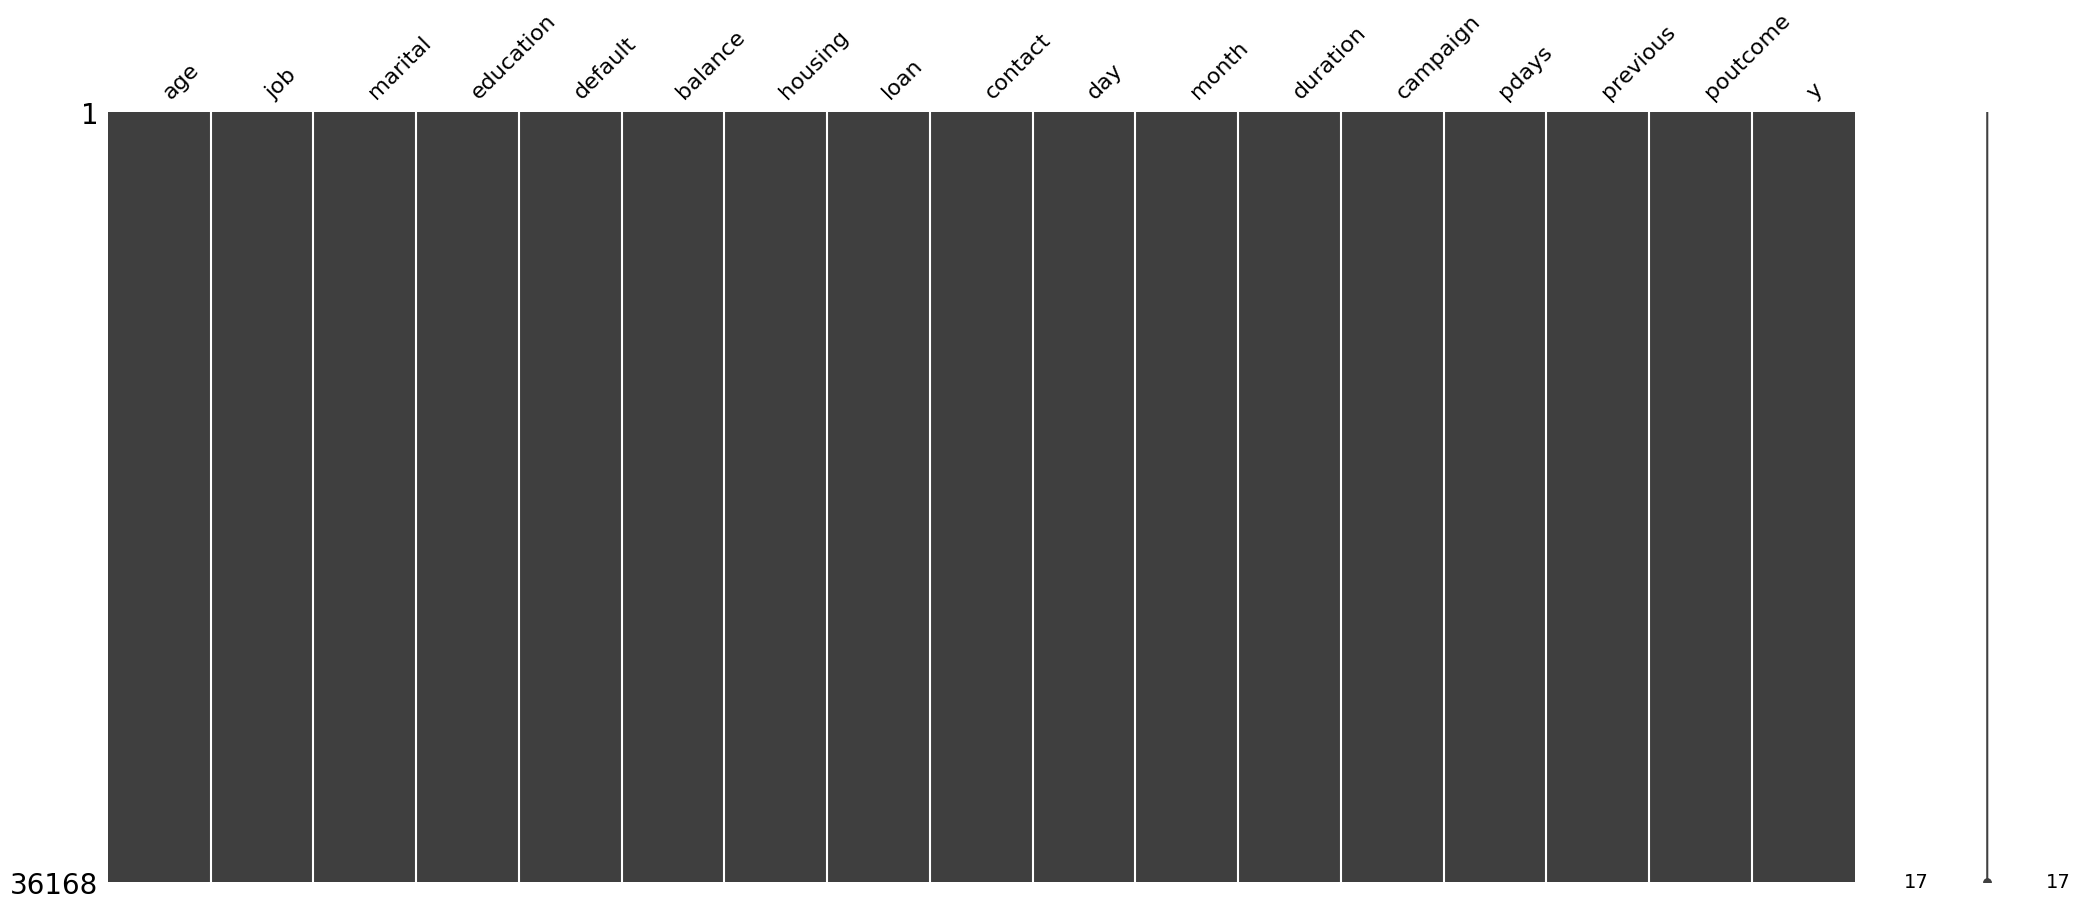

In [221]:
import missingno as ms

ms.matrix(df_raw)
plt.show()

From the plot above, we can conclude that incompleteness error is not an issue in this dataset as all features have non-null values.

In [222]:
# check the data types of the columns
df_raw.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [223]:
# check the statistics of the dataset's numeric columns
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36168.0,40.942076,10.616610,18.0,33.0,39.0,48.00,95.0
balance,36168.0,1365.055989,3098.191637,-8019.0,72.0,448.0,1422.25,102127.0
day,36168.0,15.778534,8.313360,1.0,8.0,16.0,21.00,31.0
duration,36168.0,258.363166,257.188052,0.0,103.0,180.0,320.00,4918.0
campaign,36168.0,2.769907,3.119367,1.0,1.0,2.0,3.00,63.0
pdays,36168.0,39.749889,99.547099,-1.0,-1.0,-1.0,-1.00,871.0
previous,36168.0,0.579601,2.384831,0.0,0.0,0.0,0.00,275.0


To check for invalidity errors in the numerical data summary, let us examine whether any of the numerical variables have values that are outside of a meaningful range.

*   `age` : the age column appears to be within a reasonable range, with a minimum of 18 and maximum of 95. There are no obvious invalid values for age in this dataset.
*   `balance` : the balance column represents the average yearly balance. While negative balances might be unusual, they are not necessarily invalid, as an overdraft or debt could result in negative balances. However, further investigation may be needed to confirm the validity of these negative balances.
*   `day` : the day column is the day of the month when the client was contacted. The range appears to be valid, as days of the month should fall within 1 and 31.
*   `duration` : the duration variable represents the duration of the last contact in seconds. A minimum duration of 0 seconds may indicate missing or invalid data, as it's highly unlikely that a call had a duration of 0 seconds. Further investigation is needed to address this issue.
*   `campaign` : the campaign variable appears to be within a reasonable range, representing the number of contacts performed during this campaign. A minimum value of 1 is present, which is expected, as the customer would have been contacted at least once for the marketing campaign.
*   `pdays` : while a minimum value of -1 might seem like an anomaly, it is stated that a value of -1 means that the client was not previously contacted. Hence, the values for this column are acceptable.
*   `previous` : this column is the number of contacts made before this campaign. A value greater than 0 is expected, as can be seen in this dataset.

In summary, the numerical data summary suggests that most of the variables are within meaningful ranges. However, further investigation is needed for the "Duration" variable with a minimum value of 0 seconds, as this may indicate potential invalid data. Additionally, negative balances in the "Balance" variable should be examined to determine their validity in the context of the dataset.

In [224]:
df_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [225]:
# check for unique values in columns with values that are non-numerical
unique_values = []

for column in df_raw.select_dtypes("object").columns:
  unique_values.append([column, df_raw[column].unique()])

df_unique = pd.DataFrame([[row[1]] for row in unique_values], columns=['unique_values'], index=[row[0] for row in unique_values])

df_unique

,unique_values
job,"[technician, management, admin., services, blu..."
marital,"[divorced, married, single]"
education,"[secondary, tertiary, primary, unknown]"
default,"[no, yes]"
housing,"[yes, no]"
loan,"[yes, no]"
contact,"[cellular, unknown, telephone]"
month,"[jul, may, jun, apr, feb, jan, aug, nov, dec, ..."
poutcome,"[unknown, other, failure, success]"
y,"[no, yes]"


We can see that in the table above, there are a few columns with `unknown` values. These columns are `job`, `education`, `contact` and `poutcome`. This may indicate *inaccuracy error* in the dataset as the data are not a measure of the true value.

*   `job` : the "unknown" value may indicate inaccuracy if it represents missing or unspecified job information. It would be better to have a specific category for cases where the job is unknown or unspecified. We can expect every person would have a `job` value that belongs to one of the job groups; even if they are unemployed, a student or are retired, it should be captured in one of the other values.
*   `education` : Likewise, every person would have `education` value; if someone has zero education, that should be captured in the dataset.
*   `contact` : it is possible that a person may not have any means of contact or a contact device. However, this dataset was collected from prior bank marketing campaigns that were based on phone calls, which means that the customer was contacted by the marketing agent through telephone. Hence, that method of contact should be a value other than unknown.
*   `poutcome` : this field should also have a value that's known, as the outcome of the previous marketing campaign would be known. The "unknown" value may represent cases where the outcome of the previous marketing campaign is genuinely unknown or missing. However, it's crucial to ensure that this category accurately reflects the data's state.


Let us view the breakdown of the value counts for these columns.

In [226]:
# get value count of 'unknown' for column
columns_with_unknown = ['job', 'education', 'contact', 'poutcome']
unknown_count = []

for column in columns_with_unknown:
  count = df_raw[column].value_counts()['unknown']
  unknown_count.append([column, count, (count/df_raw[column].count())*100])

df_unknown = pd.DataFrame(unknown_count, columns=['field', 'unknown_count', 'unknown_count_%'])

df_unknown

,field,unknown_count,unknown_count_%
0,job,232,0.641451
1,education,1496,4.136253
2,contact,10458,28.915063
3,poutcome,29623,81.903893


While unknown values values make up a relatively small proportion of the `job` and `education` fields (0.64% and 4.13%, respectively), it is a high proportion of values for the `contact` and `poutcome` fields, with 28.9% and 81.9% of all rows, respectively.

The presence of unknown values in the `job` and `education` columns, while not insignificant, is relatively manageable. However, the high prevalence of unknown values in the `contact` and `poutcome` columns is a cause for concern. Further investigation is necessary to validate the accuracy of these unknown values and to determine whether they genuinely represent missing or unspecified information or if there are data quality issues that need to be addressed.

In [227]:
# check for duplicate data
df_raw.duplicated().any()

False

Duplication error is not an issue affecting our dataset.




#### 3.3 Data Wrangling (Preprocessing)

To make structured data ready for analyses, the data should be preprocessed. Data preprocessing primarily includes transformations and scaling of the data. These processes are exercised on the cleansed dataset. Common practice is to apply for the following transformations:

*   *Extraction:* A new variable can be extracted from the current variable for ease of analyzing and using for training the ML model. In our dataset, one possible variable we could extract is the day of the week that the client was contacted (eg. sunday, monday, ..., saturday). However since we have only the `day` and `month` columns with no year, we are not able to extract this feature. One feature that can can extract though is whether a customer was previously contacted or not. This would be from the `pdays` column. The extracted feature, `pdays_binary`, would be a binary variable. This may be useful later on during feature selection and model training.
*   *Aggregation:* Two or more variables can be aggregated into one variable to consolidate similar variables. In our case, we will not aggregate any columns.
*   *Filtration:* The data rows that are not needed for the project must be identified and filtered. In our case, we will use all data rows available.
*   *Selection:* The data columns that are intuitively not needed for the project can be removed. This is different from feature selection, which is part of the data exploration step.
*   *Conversion:* The variables can be of different types: nominal, ordinal, continuous, and categorical. The variables in the dataset must be converted into appropriate types to further process and analyze them correctly. This is critical for ML model training. Before converting, values must be stripped out with prefixes and suffixes, such as currency symbols. In our case, all columns are given in an appropriate data type, hence conversion is not required.

In [246]:
# making a copy of the df_raw dataset
df_preprocessed = df_raw.copy()

# extracting the 'pdays_binary' variable
df_preprocessed['pdays_binary'] = df_preprocessed['pdays'].map(lambda x: 'no' if x == -1 else 'yes')

# moving the new column to after the 'pdays' column
col_list = df_raw.columns.tolist()
col_list.insert(col_list.index('pdays') + 1, 'pdays_binary')
df_preprocessed = df_preprocessed[col_list]

df_preprocessed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,pdays_binary,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,no,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,no,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,no,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,no,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,no,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,management,single,tertiary,no,1243,yes,no,telephone,13,nov,86,1,174,yes,1,failure,no
36164,60,blue-collar,married,secondary,no,171,yes,no,unknown,19,may,219,2,-1,no,0,unknown,no
36165,41,technician,married,secondary,no,-274,yes,no,unknown,27,may,182,3,-1,no,0,unknown,no
36166,45,blue-collar,married,primary,no,103,no,no,cellular,28,jan,64,3,-1,no,0,unknown,no


# 3. Data Exploration

In this step, the prepared data is explored to investigate and comprehend data distributions and relationships. The knowledge that is gained about the data in this stage is used throughout the project. The outcome and quality of exploration strongly affects ML model training results.

Data exploration involves three important tasks: exploratory data analysis, feature selection, and feature engineering.

**Exploratory Data Analysis (EDA):** This is the preliminary step in data exploration. Exploratory graphs, charts, and other visualizations, such as heat maps and word clouds, are designed to summarize and observe data. An important objective of EDA in a real-world ML project is to serve as a communication medium among project stakeholders, including business users, domain experts, and analysts. Relatively quick and easy exploratory visualizations help stakeholders connect and ensure the prepared data are sensible.

**Feature Selection:** This is a process whereby only pertinent features from the dataset are selected for ML model training. Selecting fewer features decreases ML model complexity and training time.

**Feature Engineering:** This is a process of creating new features by changing or transforming existing features. Model performance heavily depends on feature selection and engineering.


#### 3.1 Exploratory Data Analysis

For the structured dataset we have, each data table row contains an observation and each column contains a feature. We will perform EDA on multiple features as our dataset is multi-dimensional.

In [ ]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})
df_test['y'] = df_test['y'].replace({'yes': 1, 'no': 0})

In [ ]:
target = df['y']
input = df.drop(['y'], axis = 1)

In [ ]:
target_test = df_test['y']
input_test  = df_test.drop(['y'], axis = 1)

In [ ]:
input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown


In [ ]:
target.head()

0    0
1    0
2    0
3    0
4    1
Name: y, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 1.0)

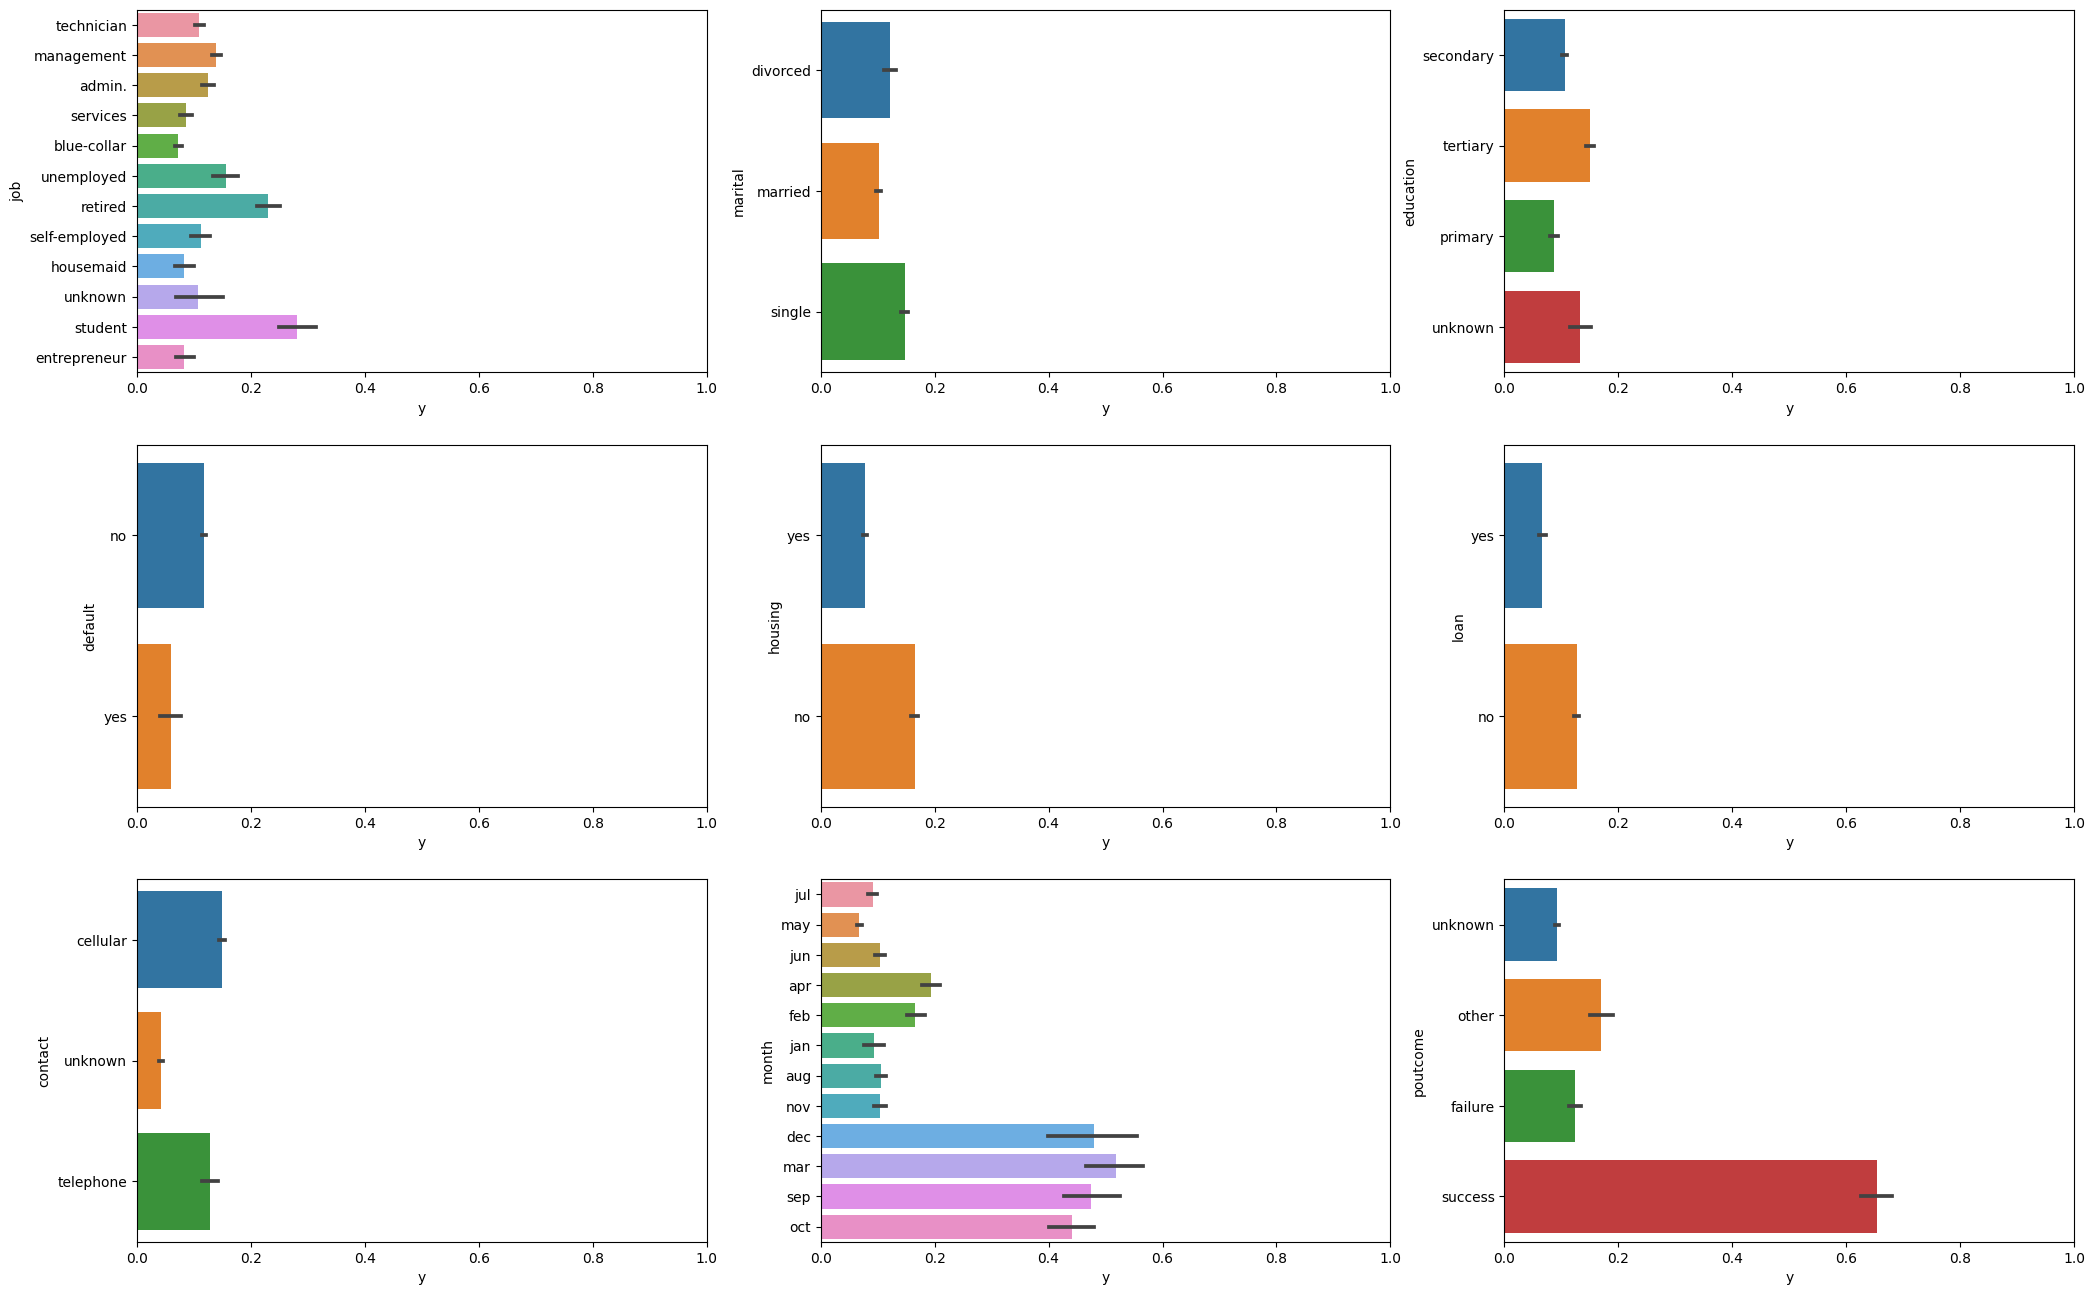

In [ ]:
# barplot of each categorical data with target data
fig, ax = plt.subplots(3, 3, figsize=(25, 16))

sns.barplot(
    x = 'y',
    y = 'job',
    data = df,
    errorbar=('ci', 95),
    orient = 'h',
    ax = ax[0][0]
)

ax[0][0].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'marital',
    data = df,
    errorbar=('ci', 95),
    orient = 'h',
    ax = ax[0][1]
)

ax[0][1].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'education',
    data = df,
    errorbar=('ci', 95),
    orient = 'h',
    ax = ax[0][2]
)

ax[0][2].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'default',
    data = df,
    errorbar=('ci', 95),
    orient = 'h',
    ax = ax[1][0]
)

ax[1][0].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'housing',
    data = df,
    errorbar=('ci', 95),
    orient = 'h',
    ax = ax[1][1]
)

ax[1][1].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'loan',
    data = df,
    errorbar=('ci', 95),
    orient = 'h',
    ax = ax[1][2]
)

ax[1][2].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'contact',
    data = df,
    errorbar=('ci', 95),
    orient = 'h',
    ax = ax[2][0]
)

ax[2][0].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'month',
    data = df,
    orient = 'h',
    errorbar=('ci', 95),
    ax = ax[2][1]
)

ax[2][1].set_xlim(0, 1)

sns.barplot(
    x = 'y',
    y = 'poutcome',
    data = df,
    errorbar=('ci', 95),
    orient = 'h',
    ax = ax[2][2],
)

ax[2][2].set_xlim(0, 1)

In [ ]:
# Get the dummy variables for categorical data and Standardize the numerical data
from sklearn.preprocessing import StandardScaler
input_encoded = pd.get_dummies(input, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

columns_to_scale = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()

input_encoded[columns_to_scale] = scaler.fit_transform(input_encoded[columns_to_scale])

In [ ]:
input_encoded

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.099649,-0.465780,1.590410,-0.965700,6.485410,-0.409359,-0.243040,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.853196,-0.406390,-0.093650,0.504062,-0.246819,-0.409359,-0.243040,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.570616,-0.309235,-1.296549,-0.744070,2.959004,-0.409359,-0.243040,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,-0.182931,-0.133323,0.026640,-0.763511,-0.567401,-0.409359,-0.243040,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,-1.030671,-0.323114,1.710700,0.185224,-0.246819,-0.409359,-0.243040,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,-1.030671,-0.039396,-0.334230,-0.670193,-0.567401,1.348628,0.176283,0,0,0,...,0,0,0,1,0,0,1,0,0,0
36164,1.795129,-0.385410,0.387510,-0.153054,-0.246819,-0.409359,-0.243040,0,1,0,...,0,0,1,0,0,0,0,0,0,1
36165,0.005456,-0.529044,1.349830,-0.296920,0.073764,-0.409359,-0.243040,0,0,0,...,0,0,1,0,0,0,0,0,0,1
36166,0.382229,-0.407358,1.470120,-0.755734,0.073764,-0.409359,-0.243040,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
input_test_encoded = pd.get_dummies(input_test, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

input_test_encoded[columns_to_scale] = scaler.fit_transform(input_test_encoded[columns_to_scale])

<Axes: ylabel='count'>

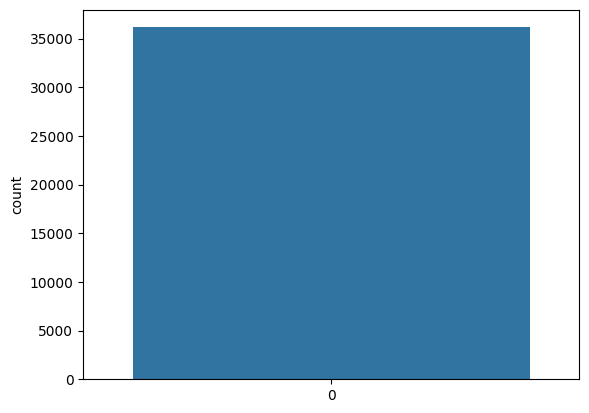

In [ ]:
sns.countplot(target)

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Check the original class distribution
print("Original class distribution:", np.bincount(target))

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(input_encoded, target)
print("Class distribution after SMOTE:", np.bincount(y_smote))

# Random oversampling
ros = RandomOverSampler(sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(input_encoded, target)
print("Class distribution after Random OverSampling:", np.bincount(y_ros))

# Undersampling
rus = RandomUnderSampler(sampling_strategy='auto')
X_rus, y_rus = rus.fit_resample(input_encoded, target)
print("Class distribution after Random UnderSampling:", np.bincount(y_rus))

Original class distribution: [31937  4231]
Class distribution after SMOTE: [31937 31937]
Class distribution after Random OverSampling: [31937 31937]
Class distribution after Random UnderSampling: [4231 4231]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
# Choose to use the Random oversampling strategy
X_ros

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.099649,-0.465780,1.590410,-0.965700,6.485410,-0.409359,-0.243040,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.853196,-0.406390,-0.093650,0.504062,-0.246819,-0.409359,-0.243040,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.570616,-0.309235,-1.296549,-0.744070,2.959004,-0.409359,-0.243040,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,-0.182931,-0.133323,0.026640,-0.763511,-0.567401,-0.409359,-0.243040,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,-1.030671,-0.323114,1.710700,0.185224,-0.246819,-0.409359,-0.243040,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63869,-0.559704,-0.206916,-0.213940,0.111347,-0.246819,3.769626,0.176283,0,0,0,...,0,0,0,0,0,0,1,0,0,0
63870,0.759003,-0.346031,1.470120,0.752910,-0.567401,-0.409359,-0.243040,1,0,0,...,1,0,0,0,0,0,0,0,0,1
63871,0.476423,0.496730,1.710700,2.821464,-0.246819,-0.409359,-0.243040,0,0,0,...,0,0,1,0,0,0,0,0,0,1
63872,1.324163,-0.246294,-1.055970,0.356308,-0.567401,0.585159,1.853574,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score, GridSearchCV

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_ros, y_ros, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_ros, y_ros, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_ros, y_ros, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_ros, y_ros, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_ros, y_ros, cv=3)
grad_mean = grad_scores.mean()

# XGBoost Classifier
xgb_clf = XGBClassifier()
grad_scores = cross_val_score(xgb_clf, X_ros, y_ros, cv=3)
xgb_mean = tree_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier()
rand_scores = cross_val_score(rand_clf, X_ros, y_ros, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_ros, y_ros, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_ros, y_ros, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['log_reg', 'svc_clf', 'knn_clf', 'tree_clf', 'grad_clf', 'xgb_clf', 'rand_clf', 'neural_clf', 'nav_clf'],
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean,xgb_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [ ]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
6,rand_clf,0.965980
3,tree_clf,0.955929
5,xgb_clf,0.955929
2,knn_clf,0.910386
1,svc_clf,0.888186
4,grad_clf,0.864421
7,neural_clf,0.855935
8,nav_clf,0.855935
0,log_reg,0.834988


In [ ]:
# Fit each machine learning algorithms with default value with data resampling
classifiers = [
    ('log_reg', LogisticRegression()),
    ('svc_clf', SVC()),
    ('knn_clf', KNeighborsClassifier()),
    ('tree_clf', tree.DecisionTreeClassifier()),
    ('grad_clf', GradientBoostingClassifier()),
    ('xgb_clf', XGBClassifier()),
    ('rand_clf', RandomForestClassifier()),
    ('neural_clf', MLPClassifier(alpha=1)),
    ('nav_clf', GaussianNB()),
]

results = []

for name, clf in classifiers:
    clf.fit(X_ros, y_ros)
    y_test_pred = clf.predict(input_test_encoded)
    precision = precision_score(target_test, y_test_pred)
    recall = recall_score(target_test, y_test_pred)
    f1 = f1_score(target_test, y_test_pred)
    accuracy = accuracy_score(target_test, y_test_pred)

    results.append({
        'Classifier': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })
results_df = pd.DataFrame(results)

print(results_df)

   Classifier  Precision    Recall  F1 Score  Accuracy
0     log_reg   0.415822  0.814745  0.550623  0.844410
1     svc_clf   0.437560  0.861059  0.580255  0.854252
2     knn_clf   0.410028  0.695652  0.515948  0.847285
3    tree_clf   0.473205  0.442344  0.457255  0.877143
4    grad_clf   0.419844  0.863894  0.565070  0.844410
5     xgb_clf   0.490476  0.778828  0.601899  0.879465
6    rand_clf   0.597961  0.499055  0.544049  0.902134
7  neural_clf   0.401140  0.864839  0.548068  0.833131
8     nav_clf   0.356692  0.586957  0.443730  0.827823


In [ ]:
# Fit each machine learning algorithms with default value without resampling data.
classifiers = [
    ('log_reg', LogisticRegression()),
    ('svc_clf', SVC()),
    ('knn_clf', KNeighborsClassifier()),
    ('tree_clf', tree.DecisionTreeClassifier()),
    ('grad_clf', GradientBoostingClassifier()),
    ('xgb_clf', XGBClassifier()),
    ('rand_clf', RandomForestClassifier()),
    ('neural_clf', MLPClassifier(alpha=1)),
    ('nav_clf', GaussianNB()),
]

results = []

for name, clf in classifiers:
    clf.fit(input_encoded, target)
    y_test_pred = clf.predict(input_test_encoded)
    precision = precision_score(target_test, y_test_pred)
    recall = recall_score(target_test, y_test_pred)
    f1 = f1_score(target_test, y_test_pred)
    accuracy = accuracy_score(target_test, y_test_pred)

    results.append({
        'Classifier': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })
results_df = pd.DataFrame(results)

print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Classifier  Precision    Recall  F1 Score  Accuracy
0     log_reg   0.634686  0.325142  0.430000  0.899149
1     svc_clf   0.653501  0.344045  0.450774  0.901913
2     knn_clf   0.614007  0.356333  0.450957  0.898485
3    tree_clf   0.483932  0.483932  0.483932  0.879244
4    grad_clf   0.647147  0.407372  0.500000  0.904678
5     xgb_clf   0.612069  0.469754  0.531551  0.903129
6    rand_clf   0.631659  0.392250  0.483965  0.902134
7  neural_clf   0.640310  0.390359  0.485026  0.903019
8     nav_clf   0.385169  0.505671  0.437270  0.847728


## Better F1 score with resampling data since imbalanced class
## Better accuacy score without resampling data

In [ ]:
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rand_clf, param_grid=rand_param_grid,
                           cv=3, n_jobs=-1, scoring='f1')

grid_search.fit(X_ros, y_ros)

'''

"\nparam_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_features': ['auto', 'sqrt'],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\ngrid_search = GridSearchCV(estimator=rand_clf, param_grid=rand_param_grid, \n                           cv=3, n_jobs=-1, scoring='f1')\n\ngrid_search.fit(X_ros, y_ros)\n\n"

In [ ]:
'''
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
'''

'\nbest_parameters = grid_search.best_params_\nbest_model = grid_search.best_estimator_\n'

In [ ]:
'''
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rand_clf, input_test_encoded, target_test, cv=3)
'''

'\nfrom sklearn.model_selection import cross_val_predict\n\ny_test_pred = cross_val_predict(rand_clf, input_test_encoded, target_test, cv=3)\n'

In [ ]:
'''
rand_forest_pred = RandomForestClassifier().predict(input_test_encoded)
cm = confusion_matrix(target_test, rand_forest_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
'''

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
'''
xgboost_pred = xgb_clf.predict(input_test_encoded)
cm = confusion_matrix(target_test, xgboost_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
'''

In [ ]:
params = rand_clf.get_params()
for key, value in params.items():
    print(f"{key}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [ ]:
# Setting up hyperparameter ranges for tuning a Random Forest classifier
n_estimators = list(np.arange(200, 1000, 100))
max_features = ['auto', 'sqrt']
max_depth = list(np.arange(10, 200, 10))
max_depth.append(None)
min_samples_split = list(np.arange(1, 15, 1))
min_samples_leaf = list(np.arange(1, 10, 1))
bootstrap = [True, False]
min_weight_fraction_leaf = list(np.arange(0,1,0.1))

class_weights_1 = [1, 2, 3, 4, 5]
class_weight_grid = [{0: 1, 1: weight} for weight in class_weights_1]
class_weight_grid.append(None)


random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
    'min_weight_fraction_leaf': min_weight_fraction_leaf,
    'class_weight': class_weight_grid
}

print(random_grid)

{'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'bootstrap': [True, False], 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]}


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rand_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=5101, n_jobs = -1, scoring = 'f1_macro')
rf_random.fit(X_ros, y_ros)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 2},
                                                         {0: 1, 1: 3},
                                                         {0: 1, 1: 4},
                                                         {0: 1, 1: 5}],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2,
                                                                     0.30000000000000004,
                                                                     0.4, 0.5,
                                                                     0.6000000000000001,
                                                                     0.7000000000000001,
                                                                     0.8, 0.9],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900]},
                   random_state=5101, scoring='f1_macro')

In [ ]:
# Setting up a Randomized Search with Cross Validation to find the best hyperparameters for the RandomForestClassifier
best_random = rf_random.best_estimator_.fit(X_ros, y_ros)

In [ ]:
params = rf_random.best_estimator_.get_params()
for key, value in params.items():
    print(f"{key}: {value}")

bootstrap: False
ccp_alpha: 0.0
class_weight: {0: 1, 1: 1}
criterion: gini
max_depth: 190
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 4
min_samples_split: 12
min_weight_fraction_leaf: 0.0
n_estimators: 400
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [ ]:
rf_random_pred = best_random.predict(input_test_encoded)

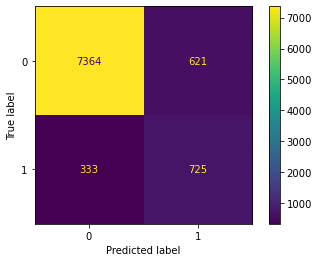

In [ ]:
cm = confusion_matrix(target_test, rf_random_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
print("Precision Score: {:.3f}".format(precision_score(target_test, rf_random_pred)))
print("Recall Score:    {:.3f}".format(recall_score(target_test, rf_random_pred)))
print("F1 Score:        {:.3f}".format(f1_score(target_test, rf_random_pred)))
print("Accuracy Score:  {:.3f}".format(accuracy_score(target_test, rf_random_pred)))

Precision Score: 0.539
Recall Score:    0.685
F1 Score:        0.603
Accuracy Score:  0.895


## The F1 score improve after random grid search